# Week 10: Colab Experiment

# I. Introduction
In this exercise, we apply CNN to MNIST data to classify the hand written digits.

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# Data Loading
Load the data from the MNIST dataset

In [2]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

# Visualize dataset sample
Show some sample.

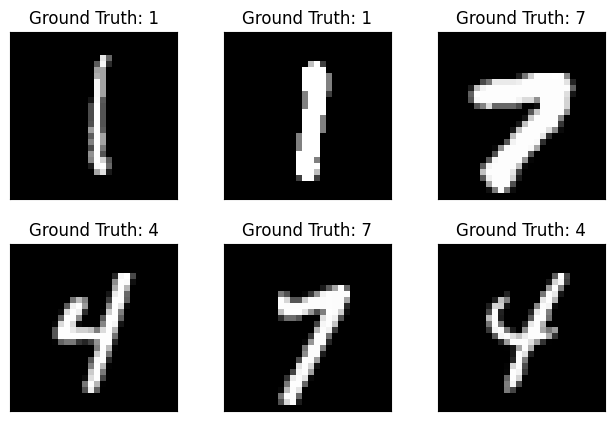

In [3]:
# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

# II. Methods


In [4]:
from os import X_OK

# This class implements a minimal network (which still does okay)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Valid convolution, 1 channel in, 2 channels out, stride 1, kernel size = 3
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3)
        # Dropout for convolutions
        self.drop = nn.Dropout2d()
        # Fully connected layer
        self.fc1 = nn.Linear(338, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.drop(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.log_softmax(x)
        return x



In [5]:
# TODO: Change above Net to Net2 class to implement

# 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
# 2. A max pooling operation over a 2x2 area
# 3. A Relu
# 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
# 5. A 2D Dropout layer
# 6. A max pooling operation over a 2x2 area
# 7. A relu
# 8. A flattening operation
# 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
# 10. A ReLU
# 11. A fully connected layer mapping from 50 to 10 dimensions
# 12. A softmax function.

class Net2(nn.Module):
    def __init__(self):
      super(Net2, self).__init__()
      # First convolutional layer: kernel size 5, 1 input channel, 10 output channels
      self.conv1 = nn.Conv2d(1, 10, kernel_size=5)

      # Second convolutional layer: kernel size 5, 10 input channels, 20 output channels
      self.conv2 = nn.Conv2d(10, 20, kernel_size=5)

      # 2D Dropout layer
      self.drop = nn.Dropout2d()

      # Initializing to 320 based on input size reduction
      self.fc1 = nn.Linear(320, 50)

      # Fully connected layer (50 to 10 dimensions)
      self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
      # step 1: Convolution layer
      x = self.conv1(x)

      # step 2: Max pooling operation over 2x2 area
      x = F.max_pool2d(x, 2)

      # step 3: ReLU activation
      x = F.relu(x)

      # step 4: Second convolution layer
      x = self.conv2(x)

      # step 5: Dropout layer
      x = self.drop(x)

      # step 6: Max pooling operation over 2x2 area
      x = F.max_pool2d(x, 2)

      # step 7: ReLU activation
      x = F.relu(x)

      # step 8: Flattening operation
      x = x.view(-1, 320)  # 320 here based on the output shape after convolution and pooling

      # step 9: Fully connected layer
      x = self.fc1(x)

      # step 10: ReLU activation
      x = F.relu(x)

      # step 11: Fully connected layer
      x = self.fc2(x)

      # step 12: Softmax activation
      x = F.log_softmax(x, dim=1)

      return x



In [6]:
# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [7]:
# Main training routine
# TODO: Read it and understand what it does, you would need to implement it in the next colab HW

# 每次結束時計算 loss，每隔10次 output 一次訓練狀態
def train(epoch, model):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader): # batch_idx 是批次index，從0開始
    # (data, target): (影像數據, 對應標籤)
    optimizer.zero_grad()  # 將上次計算的梯度歸零，防止累積梯度影響本次更新
    output = model(data)
    loss = F.nll_loss(output, target)  # negative log
    loss.backward()  # 計算每個參數梯度
    optimizer.step()  #　更新模型參數
    # Store results
    if batch_idx % 10 == 0:
      pred = output.data.max(1, keepdim=True)[1]  # 找機率最大的位置（預測類別）
      correct = pred.eq(target.data.view_as(pred)).sum()  # 比較預測pred和實際target，正確預測量
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))
      #  每10次輸出當前訓練狀態，包含訓練輪數、已訓練樣本數、總樣本數和當前損失值

In [8]:
# Run on test data
# TODO: Read it and understand what it does, you would need to implement it in the next colab HW

def test(model):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():  # 不用梯度計算以加速推理過程，並減少內存使用
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()  # size_average:不取平均，累積損失值以便後續計算平均損失
      pred = output.data.max(1, keepdim=True)[1]  # 機率最大的預測類別
      correct += pred.eq(target.data.view_as(pred)).sum()  # 正確預測數量
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  # output 測試結果，包括平均損失、正確預測樣本數、總樣本數和準確率
  return 100. * correct / len(test_loader.dataset)

In [9]:
# Train and test Model 1

# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model)
accuracy1 = test(model)


<ipython-input-4-b8ebf8cbff0b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.4526, Accuracy: 1446/10000 (14%)

Train Epoch: 1 [0/60000]	Loss: 2.543816
Train Epoch: 1 [640/60000]	Loss: 2.430902
Train Epoch: 1 [1280/60000]	Loss: 2.184910
Train Epoch: 1 [1920/60000]	Loss: 2.131505
Train Epoch: 1 [2560/60000]	Loss: 1.966648
Train Epoch: 1 [3200/60000]	Loss: 1.814692
Train Epoch: 1 [3840/60000]	Loss: 1.578962
Train Epoch: 1 [4480/60000]	Loss: 1.937963
Train Epoch: 1 [5120/60000]	Loss: 1.588775
Train Epoch: 1 [5760/60000]	Loss: 1.628160
Train Epoch: 1 [6400/60000]	Loss: 1.499397
Train Epoch: 1 [7040/60000]	Loss: 1.496967
Train Epoch: 1 [7680/60000]	Loss: 1.679612
Train Epoch: 1 [8320/60000]	Loss: 1.224873
Train Epoch: 1 [8960/60000]	Loss: 1.311262
Train Epoch: 1 [9600/60000]	Loss: 1.249011
Train Epoch: 1 [10240/60000]	Loss: 1.203141
Train Epoch: 1 [10880/60000]	Loss: 1.131563
Train Epoch: 1 [11520/60000]	Loss: 1.173080
Train Epoch: 1 [12160/60000]	Loss: 1.120545
Train Epoch: 1 [12800/60000]	Loss: 1.263609
Train Epoch: 1 [13440/60000]	Loss: 1.2

In [10]:
# Train and test Model 2

# Create network
model2 = Net2()
# Initialize model weights
model2.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model2.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model2)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model2)
accuracy2 = test(model2)


Test set: Avg. loss: 2.4400, Accuracy: 1032/10000 (10%)

Train Epoch: 1 [0/60000]	Loss: 2.450335
Train Epoch: 1 [640/60000]	Loss: 2.239987
Train Epoch: 1 [1280/60000]	Loss: 2.032527
Train Epoch: 1 [1920/60000]	Loss: 2.031553
Train Epoch: 1 [2560/60000]	Loss: 1.864995
Train Epoch: 1 [3200/60000]	Loss: 1.588605
Train Epoch: 1 [3840/60000]	Loss: 1.526454
Train Epoch: 1 [4480/60000]	Loss: 1.255484
Train Epoch: 1 [5120/60000]	Loss: 1.039349
Train Epoch: 1 [5760/60000]	Loss: 1.115046
Train Epoch: 1 [6400/60000]	Loss: 0.866646
Train Epoch: 1 [7040/60000]	Loss: 0.980188
Train Epoch: 1 [7680/60000]	Loss: 0.953560
Train Epoch: 1 [8320/60000]	Loss: 0.968576
Train Epoch: 1 [8960/60000]	Loss: 0.895470
Train Epoch: 1 [9600/60000]	Loss: 0.639581
Train Epoch: 1 [10240/60000]	Loss: 0.869754
Train Epoch: 1 [10880/60000]	Loss: 0.977854
Train Epoch: 1 [11520/60000]	Loss: 0.824896
Train Epoch: 1 [12160/60000]	Loss: 0.595552
Train Epoch: 1 [12800/60000]	Loss: 0.584257
Train Epoch: 1 [13440/60000]	Loss: 0.5

## III. Results

Here we train the CNN model and apply it to the test set. There are 10 epochs in training. There is no validation set here, we simply take the model at the end of the training procedure.

In [11]:
print(f"Model 1 Accuracy: {round(float(accuracy1.numpy()),2)}%")
print(f"Model 2 Accuracy: {round(float(accuracy2.numpy()),2)}%")

Model 1 Accuracy: 92.52%
Model 2 Accuracy: 98.65%


<ipython-input-4-b8ebf8cbff0b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


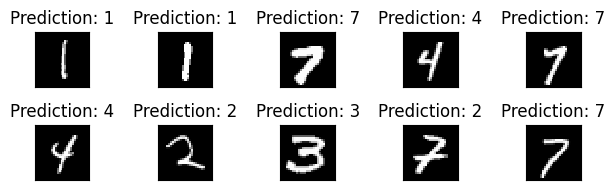

In [12]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

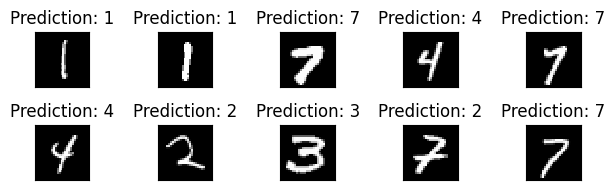

In [13]:
# Run network on data we got before and show predictions
output = model2(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

# IV. Conclusion and Discussion

**Discussion**

　　這次對 MNIST 數字分類的作業中，得到的結果是 2D 網絡模型（model2）的表現比 1D 網絡模型（model）的表現好。

1D model 的 Test set: Avg. loss: 0.2793, Accuracy: 9252/10000 (93%)

2D model 的 Test set: Avg. loss: 0.0403, Accuracy: 9865/10000 (99%)。

從結果可看出相較於 1D 模型（Accuracy 約為93%）， 2D 模型的預測（Accuracy 約為 99%）更為準確、2D 模型的損失（0.0403）也比 1D 模型的損失（0.2793）少許多，且 2D 模型通常誤分類的情況較少。這兩個模型之間的主要區別可能在於如何處理空間信息。2D 網絡結構能有效捕捉圖像中的空間模式，例如數字的邊緣和形狀，使其更適合處理像 MNIST 的圖像數據。相反，1D 模型可能難以提取這些空間特徵，從而導致較低的準確度。

　　除了網絡架構之外，訓練輪次的數量也是提高準確度和減少損失的關鍵。增加 epoch 能讓模型有更多的迭代機會去學習數據中的模式，有助於提高準確度並減少平均損失。然而，在某個點之後，增加 epoch 可能會導致過擬合，這時模型在訓練數據上的表現很好，但在未見過的測試數據上表現較差。為了平衡這一點，利用像是 Early Stopping、Regularization 或驗證損失監控等方法，可以有效避免過擬合，同時確保模型達到預期的準確度。

**Conclusion**

　　從這次作業可以看出模型架構和訓練時間在圖像分類任務中達到高準確度的重要性。由於能夠有效利用數據中的空間關係，2D 模型在 MNIST 分類中表現優於 1D 模型。為了進一步提高性能，調整訓練輪次的數量並實施防止過擬合可能會有效。未來的改進可以透過優化 hyperparameters（如 learning rate、批量大小）以及加入數據增強（Data Augmentation）等方法，進一步提升模型的準確度並減少平均損失。

